In [1]:
import deorbit
import numpy as np
import matplotlib.pyplot as plt
from deorbit.utils.dataio import load_sim_data, load_sim_config
from deorbit.utils.plotting import plot_trajectories, plot_height

The example notebook exists to demonstrate the simulator with added noise. The noise types available are gaussian, occuring at every time step to allow for simplifications made, and impulse to simulate larger deviations and so has a much smaller chance of occuring. The strength and probability of impulse noise can be editted as desired.

In [2]:
save_path = "eg/sim_example_noise/" #take care to delete this data file when making changes to initial set up

sim_data = load_sim_data(save_path)
sim_config = load_sim_config(save_path)

#this takes roughly 10 seconds
if sim_data is None or sim_config is None:
    np.random.seed(0)
    sim = deorbit.simulator.run(
        "RK4",
        "coesa_atmos_fast",
        initial_state=np.array((deorbit.constants.EARTH_RADIUS + 150000, 0, 0, 7820)),
        time_step=2,
        noise_types = {"gaussian": {"noise_strength": 0.01}, "impulse": {"impulse_strength": 0.1, "impulse_probability": 1e-5}},
    )
    sim_data = sim.gather_data()
    sim_config = sim.export_config()
    sim.save_data(save_path)
else:
    print("Loaded data from file")


Loaded data from file


To visualise the noise the height can be plotted.

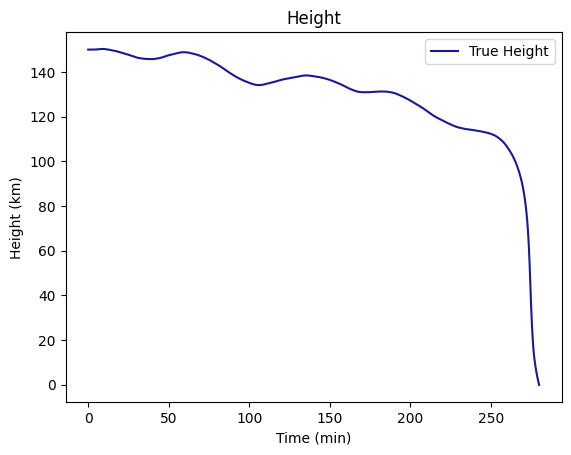

In [3]:
traj = sim_data.state_array()[:, :2]

plot_height(traj, sim_data.times)

The above plot shows how the noise has affected the height of the satellite.